<a href="https://colab.research.google.com/github/NightMachinary/soal_playground/blob/master/tmp/soalpy_playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%bash
nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


# bootstrap

In [15]:
!sudo apt-get install -y zsh time

Reading package lists... Done
Building dependency tree       
Reading state information... Done
time is already the newest version (1.7-25.1build1).
zsh is already the newest version (5.4.2-3ubuntu3.1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [16]:
%%bash
pip install -U brish

In [59]:
%%script zsh
code_dir='/content/code'
mkdir -p "$code_dir"
cd "$code_dir" 
if test -e soal_playground ; then
  cd soal_playground
  git pull origin master
  pip install --no-deps --force-reinstall ./soalpy
else
  git clone https://github.com/NightMachinary/soal_playground
  cd soal_playground
fi

Updating 00fb870..82134d6
Fast-forward
 soalpy/soalpy/runners.py | 144 ++++++++++++++++++++++++-----------------------
 1 file changed, 74 insertions(+), 70 deletions(-)
Processing ./soalpy
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for soalpy: filename=soalpy-0.1.0-py3-none-any.whl size=3941 sha256=da2175a64f5e42296834da88c87c8f9d499e12f2bb9ff8063e84809236ed39c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-8cabel4b/wheels/e6/3e/8e/9aebf83980bfd925be2547061638fdce8f537183dce9362ecf
Successfully built soalpy
  Attempting uninstall: soalpy
    Found existing installation: soalpy 0.1.0
    Uninstalling soalpy-0.1.0:
      Successfully uninstalled soalpy-0.1.0


From https://github.com/NightMachinary/soal_playground
 * branch            master     -> FETCH_HEAD
   00fb870..82134d6  master     -> origin/master


In [18]:
%%script zsh
code_dir='/content/code'
cd "${code_dir}/soal_playground"
##
ls

benchmarks
data
dimension reduction.org
evaluations
implementations
LICENSE
logs
readme.org
requirements.txt
sk_playground.ipynb
soalpy
soalpy_playground.ipynb
src_bash
src_py
src_zsh
tutorials.org


In [19]:
%%script zsh
code_dir='/content/code'
cd "${code_dir}/soal_playground" 
##
rm ./soalpy/setup.py || true
bash ./src_bash/init.bash
zsh ./src_zsh/init.zsh
source ~/.zshenv
rehash
echo "python: $(which python)"
pip install ./soalpy

Reading package lists...
Building dependency tree...
Reading state information...
time is already the newest version (1.7-25.1build1).
unzip is already the newest version (6.0-21ubuntu1.1).
zsh is already the newest version (5.4.2-3ubuntu3.1).
The following additional packages will be installed:
  libc-ares2
Suggested packages:
  strace
The following NEW packages will be installed:
  aria2 htop libc-ares2 ncdu
0 upgraded, 4 newly installed, 0 to remove and 37 not upgraded.
Need to get 1,393 kB of archives.
After this operation, 5,226 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libc-ares2 amd64 1.14.0-1ubuntu0.1 [37.5 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 aria2 amd64 1.33.1-1 [1,236 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 htop amd64 2.1.0-3 [80.0 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 ncdu amd64 1.12-1 [38.6 kB]
Fetched 1,393 kB in 1s (1,468 kB/s)
Sele

rm: cannot remove './soalpy/setup.py': No such file or directory
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
--2022-01-21 21:18:09--  https://github.com/sharkdp/hyperfine/releases/download/v1.12.0/hyperfine_1.12.0_amd64.deb
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://objects.githubusercontent.com/github-production-release-asset-2e65be/117356231/ee5d6b99-b790-4751-a7d1-f71e0f0c4e73?X-Amz-Algorithm=AWS4-HMAC-SHA256&X-Amz-Credential=AKIAIWNJYAX4CSVEH

# benchmarks

In [62]:
%%script zsh
code_dir='/content/code'
cd "${code_dir}/soal_playground" 
##
alias gq=gquote
gquote () {
    print -r -- "${(q+@)@[1]}" "${(qq@)@[2,-1]}"
}
##
function benchmark {
    local name="${1}" ; shift || return $?
    local n="${benchmark_n:-3}"
    local cmd
    cmd=("${@}")

    local cmd_q
    cmd_q="$(gq "${cmd[@]}")"

    # name="${cmd_q}"
    # name="$(echo "$name" | tr "/'\" " '.++=')" || return $?
    
    local dest_dir
    dest_dir="${name}"
    rm -rf -- "$dest_dir" >&/dev/null
    mkdir -p "$dest_dir"
    local time_dest="${dest_dir}/time_stats"

    local time_fmt
    # time_fmt="%MKB %E"
    # time_fmt="%C\nMeasurements: %M,%e"
    time_fmt="%M,%e"

    local i
    local stdout
    local stderr
    for i in {1..${n}} ; do
        # stdout="$(mktemp)" || return $?
        stdout="${dest_dir}/out"
        # typeset -p stdout

        # stderr="$(mktemp)" || return $?
        stderr="${dest_dir}/err"
        echo '##' >> "$stderr" || return $?

        local r=0
        DEBUGME='' random_state="$i" command timeout 2h time -f "$time_fmt" zsh -fc "${cmd_q} >> ${stdout} 2>> ${stderr}" 2>> "$time_dest" || r=$?
        if [[ "$r" == 124 ]] ; then
            echo "timeout error"
        elif [[ "$r" != 0 ]] ; then
            echo "command failed with $r"
        fi

        ##
        # rm -f "$stdout" || true
        # rm -f "$stderr" || true
        ##
    done
}
##
cd src_py

local bench_dir="/content/drive/MyDrive/soalpy/benchmarks"
local data_gen_dir="/content/data_gen"

local algo_families=(
  '_misc'
  'kmeans'
  'hdbscan'
)
local algos__misc=(
  'nop'
)
local algos_kmeans=(
  'kmeans_cuml_n10_iter10e4'

  'kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics'
  'kmeans_mb2e7_sklearn_n10_iter10e4'
  'kmeans_mb2e10_sklearn_n10_iter10e4'
  'kmeans_mb2e13_sklearn_n10_iter10e4'
  
  'kmeans_b3_sklearn_n10_iter10e4'

  'kmeans_sklearn_n10_iter10e4'

  'kmeans_sklearn_full_n10_iter10e4'
  )
local algos_hdbscan=(
  'hdbscan_cuml'
)
##
local datasets=(
  'blobs_10e4_10e4'
  'blobs_10e5_10e4'
  'blobs_10e4_10e5'
  )

function blobs_gen {
  local name="${1:?}" algo="${2:?}"

  local save_p=y
  if test -z "$save_p" ; then
    benchmark "$name" python run_one.py "$algo" "${blobs_opts[@]}"
  else
    local save_dir
    save_dir="${data_gen_dir}/${dataset_name:?}"

    run_one_save_dir="$save_dir" \
      python run_one.py "save" "${blobs_opts[@]}"

    run_one_load_dir="$save_dir" \
      benchmark "$name" python run_one.py "$algo" "${blobs_opts[@]}"
  fi
}
function blobs_10e4_10e4 {
  blobs_opts=(10_000 10_000) blobs_gen "$@"
}
function blobs_10e5_10e4 {
  blobs_opts=(100_000 10_000) blobs_gen "$@"
}
function blobs_10e4_10e5 {
  blobs_opts=(10_000 100_000) blobs_gen "$@"
}
##
local ds algo_family algo_family_var algo current_dir
for ds in ${datasets[@]}; do
  echo "####### Dataset: ${ds}"
  for algo_family in ${algo_families[@]} ; do
    echo "###### Algorithm Family: ${algo_family}"
    algo_family_var="algos_${algo_family}"
    local algos=(${(@P)algo_family_var})
    for algo in ${algos[@]}; do
      echo "##### Algorithm: ${algo}"
      current_dir="${bench_dir}/${ds}/${algo_family}/${algo}"
      dataset_name="${ds}" "${ds}" "$current_dir" "$algo"

      echo "#### stats:"
      cat "${current_dir}/time_stats"
      echo "#### out:"
      cat "${current_dir}/out"
      if test -s "${current_dir}/err" ; then
        echo "#### err:"
        cat "${current_dir}/err" | egrep -v '^\s*tcmalloc: large alloc'
      fi
    done
  done
done

####### Dataset: blobs_10e4_10e4
###### Algorithm Family: _misc
##### Algorithm: nop
#### stats:
631144,4.51
630000,4.51
629548,4.48
#### out:
#### err:
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
###### Algorithm Family: kmeans
##### Algorithm: kmeans_cuml_n10_iter10e4
#### stats:
2954580,10.81
2933680,10.67
2933244,10.54
#### out:
99914576.0,1.0,1.0,1.0
99914576.0,1.0,1.0,1.0
99914576.0,1.0,1.0,1.0
#### err:
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
##### Algorithm: kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics
#### stats:
1002860,6.21
1003212,6.12
1002392,6.15
#### out:
99950192.0,0,0,0
99945872.0,0,0,0
99945344.0,0,0,0
#### err:
##
Loading the data from: /content/data_gen/blobs_10e4_10e4
##
Loading the data from: 

skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
skipped saving the dataset
tcmalloc: large alloc 8000004096 bytes == 0x55cebc386000 @  0x7f00ac1ff1e7 0x7f00aa86c49e 0x7f00aa86c534 0x7f00aa8b0565 0x7f00aa94c512 0x7f00aa94cc9f 0x7f00aa94ce12 0x55ccd67df578 0x7f00aa89cf2c 0x55ccd670d9b9 0x55ccd6710ebe 0x55ccd67b25d6 0x55ccd6794433 0x55ccd6795818 0x55ccd67b23c3 0x55ccd6794433 0x55ccd6795818 0x55ccd66ffb6e 0x55ccd67af84f 0x55ccd6794433 0x55ccd6795499 0x55ccd6830ecb 0x55ccd6830f63 0x55ccd684d033 0x55ccd6852022 0x55ccd6852202 0x55ccd685277d 0x55ccd6852939 0x7f00ab230bf7 0x55ccd67c6f39
tcmalloc: large alloc 8000004096 bytes == 0x55d0998ec000 @  0x7f00ac1ff1e7 0x7f00aa86c49e 0x7f00aa86c534 0x7f00aa8b0565 0x7f00aa8b0718 0x7f00aa93851e 0x7f00aa938fd8 0x55ccd6763255 0x55ccd67ae3e3 0x55ccd6794433 0x55ccd6795818 0x55ccd66ffb6e 0x55ccd

In [63]:
%%script zsh
cat /content/nvidia.log  | grep '16280MiB' | egrep -v '\s(2|0)MiB' 

#: max memory usage seems to be 12261MiB / 16280MiB

cat: /content/nvidia.log: No such file or directory


In [64]:
%%script zsh
local bench_dir="/content/drive/MyDrive/soalpy/benchmarks"

cd "${bench_dir}"
ls */*

blobs_10e4_10e4/hdbscan:
hdbscan_cuml

blobs_10e4_10e4/kmeans:
kmeans_b3_sklearn_n10_iter10e4
kmeans_cuml_n10_iter10e4
kmeans_mb2e10_sklearn_n10_iter10e4
kmeans_mb2e13_sklearn_n10_iter10e4
kmeans_mb2e7_sklearn_n10_iter10e4
kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics
kmeans_sklearn_full_n10_iter10e4
kmeans_sklearn_n10_iter10e4
nop

blobs_10e4_10e4/_misc:
nop

blobs_10e4_10e5/hdbscan:
hdbscan_cuml

blobs_10e4_10e5/kmeans:
kmeans_b3_sklearn_n10_iter10e4
kmeans_cuml_n10_iter10e4
kmeans_mb2e10_sklearn_n10_iter10e4
kmeans_mb2e13_sklearn_n10_iter10e4
kmeans_mb2e7_sklearn_n10_iter10e4
kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics
kmeans_sklearn_full_n10_iter10e4
kmeans_sklearn_n10_iter10e4
nop

blobs_10e4_10e5/_misc:
nop

blobs_10e5_10e4/hdbscan:
hdbscan_cuml

blobs_10e5_10e4/kmeans:
kmeans_b3_sklearn_n10_iter10e4
kmeans_cuml_n10_iter10e4
kmeans_mb2e10_sklearn_n10_iter10e4
kmeans_mb2e13_sklearn_n10_iter10e4
kmeans_mb2e7_sklearn_n10_iter10e4
kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics
kmeans_s

## plots

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 15,8.27

In [66]:
import pandas
pd = pandas
import numpy
np = numpy
from glob import glob
from fnmatch import fnmatch

bench_dir="/content/drive/MyDrive/soalpy/benchmarks"


datasets = glob(f"{bench_dir}/*")
datasets

['/content/drive/MyDrive/soalpy/benchmarks/blobs_10e4_10e4',
 '/content/drive/MyDrive/soalpy/benchmarks/blobs_10e5_10e4',
 '/content/drive/MyDrive/soalpy/benchmarks/blobs_10e4_10e5']

In [67]:
d = pd.DataFrame()

for ds in datasets:
  algos = glob(f"{ds}/*/*")
  # print(algos)

  for algo in algos:
    stats = pd.read_csv(f"{algo}/time_stats", names=['max_memory', 'time'])
    out = pd.read_csv(f"{algo}/out", 
                      names=['loss',
                             'homogeneity_score', 
                             'completeness_score',
                             'adjusted_rand_score',
                             ])
    stats = stats.join(out)
    stats['algo'] = algo.split('/')[-1]
    stats['dataset'] = ds.split('/')[-1]
    d = pd.concat([d, stats])

with pd.option_context(
    'display.max_colwidth', None,
    'max_rows', None,):
  display(d)

,max_memory,time,loss,homogeneity_score,completeness_score,adjusted_rand_score,algo,dataset
0,617688,3.74,NaN,NaN,NaN,NaN,nop,blobs_10e4_10e4
1,621960,3.68,NaN,NaN,NaN,NaN,nop,blobs_10e4_10e4
2,617096,3.68,NaN,NaN,NaN,NaN,nop,blobs_10e4_10e4
0,2954580,10.81,9.991458e+07,1.0,1.0,1.0,kmeans_cuml_n10_iter10e4,blobs_10e4_10e4
1,2933680,10.67,9.991458e+07,1.0,1.0,1.0,kmeans_cuml_n10_iter10e4,blobs_10e4_10e4
2,2933244,10.54,9.991458e+07,1.0,1.0,1.0,kmeans_cuml_n10_iter10e4,blobs_10e4_10e4
0,1002860,6.21,9.995019e+07,0.0,0.0,0.0,kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics,blobs_10e4_10e4
1,1003212,6.12,9.994587e+07,0.0,0.0,0.0,kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics,blobs_10e4_10e4
2,1002392,6.15,9.994534e+07,0.0,0.0,0.0,kmeans_mb2e7_sklearn_n10_iter10e4_no_metrics,blobs_10e4_10e4
0,1003352,6.42,9.994182e+07,1.0,1.0,1.0,kmeans_mb2e7_sklearn_n10_iter10e4,blobs_10e4_10e4


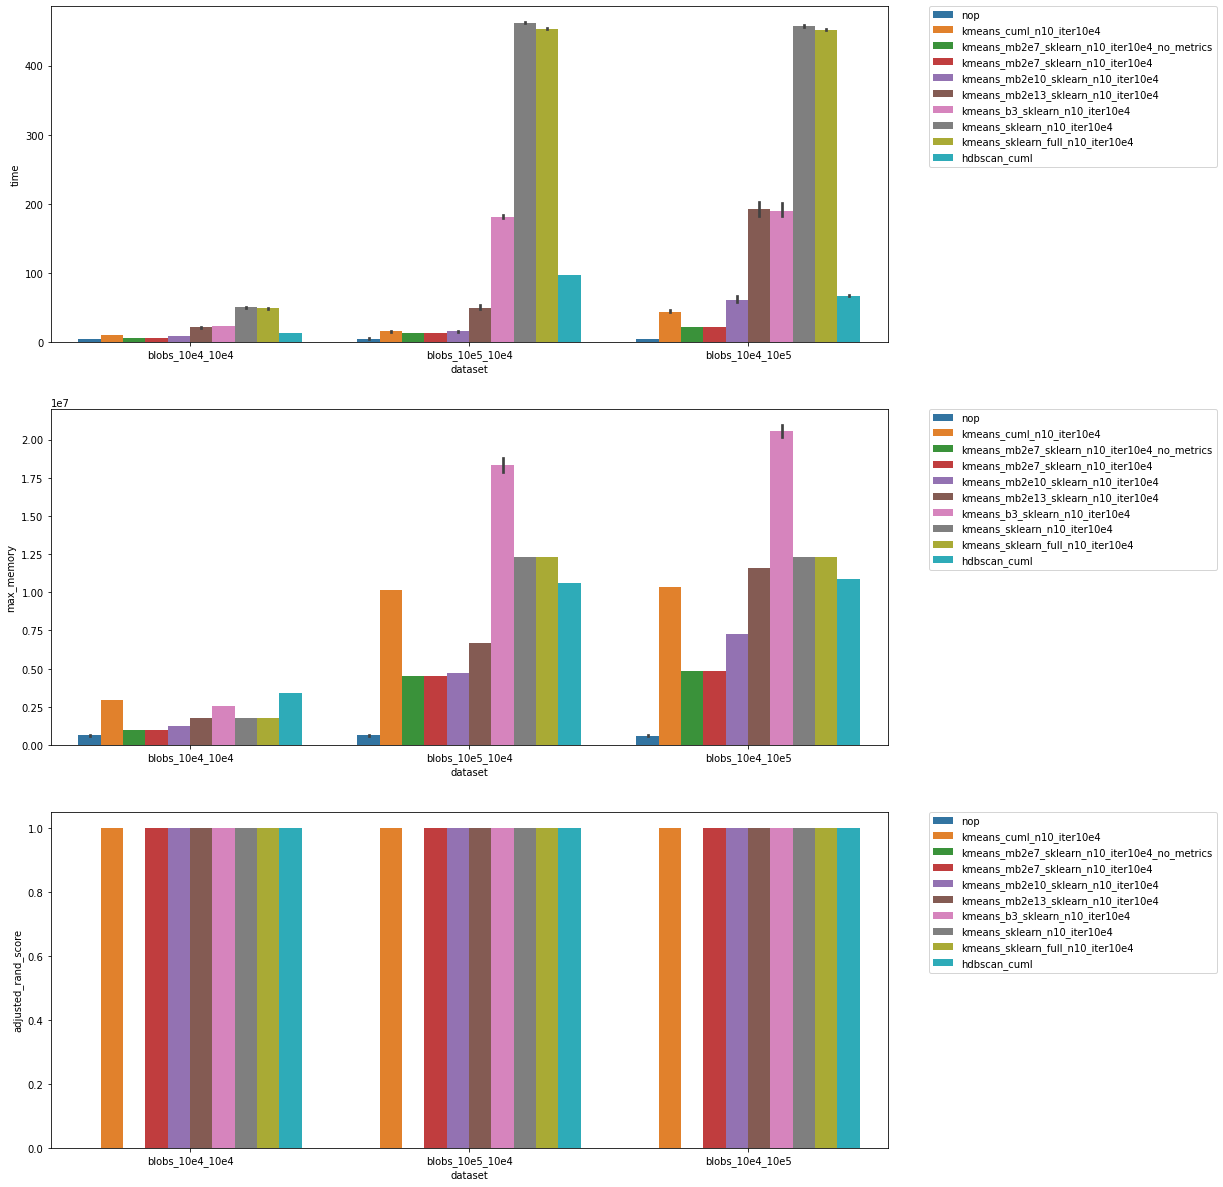

In [68]:
ys = ['time', 'max_memory', 'adjusted_rand_score']
fig, axs = plt.subplots(
    # ncols=len(ys),
    ##
    nrows=len(ys),
    figsize=(15,7*(len(ys)))
    )
for i, y in enumerate(ys):
  ax = sns.barplot(
      x='dataset',
      hue='algo',
      y=y,
      data=d,
      ax=axs[i]
  )
  if True or (i == (len(ys) - 1)):
    ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  else:
    ax.get_legend().remove()
  # display(ax)

# display(fig)
None

# tmp

In [ ]:
%%script zsh
code_dir='/content/code'
cd "${code_dir}/soal_playground" 
##
git pull origin master
cd src_py

if false; then
  echo '#############'
  cat run_one.py
  echo '#############'
fi
  
# command time -f '%M' python run_one.py nop 10_000 10_000
# command time -f '%M' python run_one.py nop_float64 10_000 10_000
command time -f 'mem: %M KB, time: %e' zsh -fc "python run_one.py hdbscan_cuml 1_000 10_0 2>/dev/null"

In [15]:
%%script zsh

command time -f 'Max memory: %M KB' python -c '
import sklearn
sklearn.show_versions()
from sklearn import datasets

blobs_opts = {
    "n_samples": 10**4,
    "n_features": 10**4,
    "centers": 10,
    "random_state": 10
}
X, y = datasets.make_blobs(**blobs_opts)
None
'


System:
    python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 07:01:05)  [GCC 9.3.0]
executable: /root/miniconda3/bin/python
   machine: Linux-5.4.144+-x86_64-with-glibc2.10

Python dependencies:
          pip: 21.3.1
   setuptools: 59.8.0
      sklearn: 1.0.2
        numpy: 1.21.5
        scipy: 1.7.3
       Cython: None
       pandas: 1.3.5
   matplotlib: 3.4.3
       joblib: 1.1.0
threadpoolctl: 3.0.0

Built with OpenMP: True


Max memory: 1708040 KB


In [21]:
%%script zsh

command time -f '%M' python -c '
from dask.distributed import Client, wait
from dask_cuda import LocalCUDACluster

cluster = LocalCUDACluster()
client = Client(cluster)

from cuml.dask import datasets

blobs_opts = {
    "n_samples": 10**4,
    "n_features": 10**4,
    "centers": 10,
    "random_state": 10
}
X, y = datasets.make_blobs(**blobs_opts)
wait(X)
# X.compute()
None
'

distributed.preloading - INFO - Import preload module: dask_cuda.initialize
1884488


In [31]:
%%script zsh

command time -f 'Max_memory: %M' python -c '
import numpy
np = numpy

n = 10**(4+4)
# a = numpy.random.default_rng().standard_normal(size=(n), dtype=np.float32)
a = np.ones((n,), dtype=np.float32)

import numba as nb
nb.cuda.to_device(a)
# import cudf
# cudf.DataFrame(a)
' 

#: 10e8: 2.1GB
#: 10e7: 1.3GB
#: 10e9: 9.0GB

Traceback (most recent call last):
  File "<string>", line 10, in <module>
AttributeError: module 'numba' has no attribute 'cuda'
Command exited with non-zero status 1
Max_memory: 470596


In [28]:
%%script zsh

git clone https://github.com/rapidsai/cudf
cd cudf
bash print_env.sh

<details><summary>Click here to see environment details</summary><pre>
     
     **git***
     commit f1e0bb6a4ee766e68d93a9958688dd9ee0df7333 (HEAD -> branch-22.04, origin/branch-22.04, origin/HEAD)
     Merge: 57ff6f55b9 5a4c5f36f0
     Author: gpuCI <38199262+GPUtester@users.noreply.github.com>
     Date:   Fri Jan 21 14:26:43 2022 -0500
     
     Merge pull request #10106 from rapidsai/branch-22.02
     
     [gpuCI] Forward-merge branch-22.02 to branch-22.04 [skip gpuci]
     **git submodules***
     
     ***OS Information***
     DISTRIB_ID=Ubuntu
     DISTRIB_RELEASE=18.04
     DISTRIB_CODENAME=bionic
     DISTRIB_DESCRIPTION="Ubuntu 18.04.5 LTS"
     NAME="Ubuntu"
     VERSION="18.04.5 LTS (Bionic Beaver)"
     ID=ubuntu
     ID_LIKE=debian
     PRETTY_NAME="Ubuntu 18.04.5 LTS"
     VERSION_ID="18.04"
     HOME_URL="https://www.ubuntu.com/"
     SUPPORT_URL="https://help.ubuntu.com/"
     BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
     PRIVACY_POLICY_URL="https://ww

Cloning into 'cudf'...
